In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

In [2]:
import torch
tkwargs = {"dtype": torch.double,
           "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
#            "device": torch.device("cpu")
          }

from botorch.acquisition.monte_carlo import qExpectedImprovement
from botorch.sampling.samplers import SobolQMCNormalSampler
import matplotlib.pyplot as plt

from one_hot_BO_utils import *

In [3]:
# global parameters

d = 5
m = 2*(d+1)
C = 5
BOUNDS = torch.tensor([[-1.0]*d,
                       [3.0]*d]).to(**tkwargs)
BOUNDS_ACQF = torch.tensor([[0.0]*C + [-1.0]*d,
                            [1.0]*C + [3.0]*d]).to(**tkwargs)

N_CANDIDATES = 1
NUM_MC_SAMPLES = 256
qmc_sampler = SobolQMCNormalSampler(num_samples=NUM_MC_SAMPLES)

N_TRIALS = 3
N_ITERS = 100

In [4]:
NU = 1.5

# BO LOOP

best_values = torch.empty(N_TRIALS, N_ITERS + 1, **tkwargs)

for t in range(N_TRIALS):
    
    # generate starting dataset
    train_X = generate_X(m, C, BOUNDS, seed=t)
    train_y = modified_neg_ackley(train_X, C)
    best_values[t, 0] = train_y.max().item()

    
    for i in range(1, N_ITERS + 1):
        
        print(f"trial {t+1}/{N_TRIALS} | iteration {i}/{N_ITERS}")
        
        new_X = []
        
        for j in range(N_CANDIDATES):
            
            # set X_pending
            if len(new_X) > 0:
                X_pending = torch.cat(new_X, dim=0)
            else:
                X_pending = None
        
            # normalize X
            train_X_normalized = normalize_with_bounds(train_X, C, BOUNDS)
        
            # initialize model
            model = initialize_models(train_X_normalized, train_y, nu=NU)
            
            # define acqf
            acqf = qExpectedImprovement(model=model, 
                                        best_f=train_y.max(),
                                        sampler=qmc_sampler,
                                        X_pending=X_pending)
        
            # get candidates
            X_picked = get_candidate(acqf, BOUNDS_ACQF, C)
            new_X.append(X_picked)
            
        new_X = torch.cat(new_X, dim=0).to(**tkwargs)
        
        # denormalize candidates
        new_X = denormalize_with_bounds(new_X, C, BOUNDS)
        
        # evaluate objective
        new_y = modified_neg_ackley(new_X, C).to(**tkwargs)
        
        # update train_X and train_y
        train_X = torch.cat([train_X, new_X], dim=0)
        train_y = torch.cat([train_y, new_y], dim=0)
        
        # update best values
        best = train_y.max().item()
        print(f"best = {best}")
        best_values[t, i] = best

trial 1/3 | iteration 1/100
best = -5.6585262806589505
trial 1/3 | iteration 2/100
best = -5.6585262806589505
trial 1/3 | iteration 3/100
best = -5.6585262806589505
trial 1/3 | iteration 4/100
best = -5.6585262806589505
trial 1/3 | iteration 5/100
best = -5.6585262806589505
trial 1/3 | iteration 6/100
best = -5.6585262806589505
trial 1/3 | iteration 7/100
best = -5.175072368601612
trial 1/3 | iteration 8/100
best = -5.175072368601612
trial 1/3 | iteration 9/100
best = -5.175072368601612
trial 1/3 | iteration 10/100
best = -2.868288353576141
trial 1/3 | iteration 11/100
best = -2.868288353576141
trial 1/3 | iteration 12/100
best = -2.868288353576141
trial 1/3 | iteration 13/100
best = -2.868288353576141
trial 1/3 | iteration 14/100
best = -2.868288353576141
trial 1/3 | iteration 15/100
best = -2.868288353576141
trial 1/3 | iteration 16/100
best = -2.868288353576141
trial 1/3 | iteration 17/100
best = -2.868288353576141
trial 1/3 | iteration 18/100
best = -2.868288353576141
trial 1/3 | i

best = -3.3938920453452757
trial 2/3 | iteration 50/100
best = -3.3938920453452757
trial 2/3 | iteration 51/100
best = -3.3938920453452757
trial 2/3 | iteration 52/100
best = -3.3938920453452757
trial 2/3 | iteration 53/100
best = -3.3938920453452757
trial 2/3 | iteration 54/100
best = -3.3938920453452757
trial 2/3 | iteration 55/100
best = -3.3938920453452757
trial 2/3 | iteration 56/100
best = -3.3938920453452757
trial 2/3 | iteration 57/100
best = -3.3938920453452757
trial 2/3 | iteration 58/100
best = -3.3938920453452757
trial 2/3 | iteration 59/100
best = -3.3938920453452757
trial 2/3 | iteration 60/100
best = -3.3938920453452757
trial 2/3 | iteration 61/100
best = -3.3938920453452757
trial 2/3 | iteration 62/100
best = -3.3938920453452757
trial 2/3 | iteration 63/100
best = -3.3938920453452757
trial 2/3 | iteration 64/100
best = -3.3938920453452757
trial 2/3 | iteration 65/100
best = -3.3938920453452757
trial 2/3 | iteration 66/100
best = -3.3938920453452757
trial 2/3 | iteration

best = -2.833207577952582
trial 3/3 | iteration 99/100
best = -2.833207577952582
trial 3/3 | iteration 100/100
best = -2.833207577952582


In [5]:
NU = 0.5

# BO LOOP

best_values_2 = torch.empty(N_TRIALS, N_ITERS + 1, **tkwargs)

for t in range(N_TRIALS):
    
    # generate starting dataset
    train_X = generate_X(m, C, BOUNDS, seed=t)
    train_y = modified_neg_ackley(train_X, C)
    best_values_2[t, 0] = train_y.max().item()

    
    for i in range(1, N_ITERS + 1):
        
        print(f"trial {t+1}/{N_TRIALS} | iteration {i}/{N_ITERS}")
        
        new_X = []
        
        for j in range(N_CANDIDATES):
            
            # set X_pending
            if len(new_X) > 0:
                X_pending = torch.cat(new_X, dim=0)
            else:
                X_pending = None
        
            # normalize X
            train_X_normalized = normalize_with_bounds(train_X, C, BOUNDS)
        
            # initialize model
            model = initialize_models(train_X_normalized, train_y, nu=NU)
            
            # define acqf
            acqf = qExpectedImprovement(model=model, 
                                        best_f=train_y.max(),
                                        sampler=qmc_sampler,
                                        X_pending=X_pending)
        
            # get candidates
            X_picked = get_candidate(acqf, BOUNDS_ACQF, C)
            new_X.append(X_picked)
            
        new_X = torch.cat(new_X, dim=0).to(**tkwargs)
        
        # denormalize candidates
        new_X = denormalize_with_bounds(new_X, C, BOUNDS)
        
        # evaluate objective
        new_y = modified_neg_ackley(new_X, C).to(**tkwargs)
        
        # update train_X and train_y
        train_X = torch.cat([train_X, new_X], dim=0)
        train_y = torch.cat([train_y, new_y], dim=0)
        
        # update best values
        best = train_y.max().item()
        print(f"best = {best}")
        best_values_2[t, i] = best

trial 1/3 | iteration 1/100
best = -5.6585262806589505
trial 1/3 | iteration 2/100
best = -5.6585262806589505
trial 1/3 | iteration 3/100
best = -3.253747844676113
trial 1/3 | iteration 4/100
best = -3.253747844676113
trial 1/3 | iteration 5/100
best = -3.253747844676113
trial 1/3 | iteration 6/100
best = -3.253747844676113
trial 1/3 | iteration 7/100
best = -3.253747844676113
trial 1/3 | iteration 8/100
best = -3.253747844676113
trial 1/3 | iteration 9/100
best = -3.253747844676113
trial 1/3 | iteration 10/100
best = -3.253747844676113
trial 1/3 | iteration 11/100
best = -3.253747844676113
trial 1/3 | iteration 12/100
best = -3.253747844676113
trial 1/3 | iteration 13/100
best = -3.253747844676113
trial 1/3 | iteration 14/100
best = -3.253747844676113
trial 1/3 | iteration 15/100
best = -3.253747844676113
trial 1/3 | iteration 16/100
best = -3.253747844676113
trial 1/3 | iteration 17/100
best = -3.253747844676113
trial 1/3 | iteration 18/100
best = -3.253747844676113
trial 1/3 | itera

best = -2.476346265795659
trial 2/3 | iteration 51/100
best = -2.476346265795659
trial 2/3 | iteration 52/100
best = -2.476346265795659
trial 2/3 | iteration 53/100
best = -2.476346265795659
trial 2/3 | iteration 54/100
best = -2.476346265795659
trial 2/3 | iteration 55/100
best = -2.476346265795659
trial 2/3 | iteration 56/100
best = -2.476346265795659
trial 2/3 | iteration 57/100
best = -2.476346265795659
trial 2/3 | iteration 58/100
best = -2.476346265795659
trial 2/3 | iteration 59/100
best = -2.476346265795659
trial 2/3 | iteration 60/100
best = -2.476346265795659
trial 2/3 | iteration 61/100
best = -2.476346265795659
trial 2/3 | iteration 62/100
best = -2.476346265795659
trial 2/3 | iteration 63/100
best = -2.476346265795659
trial 2/3 | iteration 64/100
best = -2.476346265795659
trial 2/3 | iteration 65/100
best = -2.476346265795659
trial 2/3 | iteration 66/100
best = -2.476346265795659
trial 2/3 | iteration 67/100
best = -2.476346265795659
trial 2/3 | iteration 68/100
best = -2.

best = -2.3659280439015906
trial 3/3 | iteration 99/100
best = -2.3659280439015906
trial 3/3 | iteration 100/100
best = -2.3659280439015906


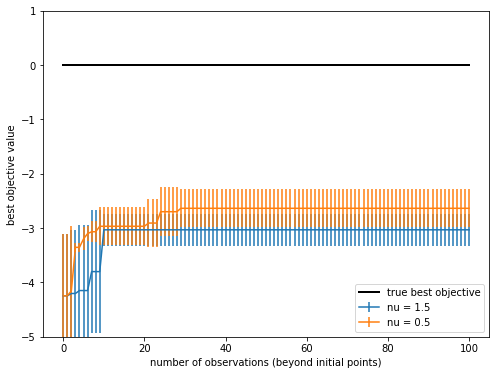

In [6]:
# plot results

def ci(y):
    return 1.96 * y.std(axis=0) / np.sqrt(N_TRIALS)


GLOBAL_MAXIMUM = 0.0


obs = np.arange(N_ITERS + 1) * N_CANDIDATES
y1 = np.asarray(best_values.to('cpu'))
y2 = np.asarray(best_values_2.to('cpu'))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.errorbar(obs, y1.mean(axis=0), yerr=ci(y1), label="nu = 1.5", linewidth=1.5)
ax.errorbar(obs, y2.mean(axis=0), yerr=ci(y2), label="nu = 0.5", linewidth=1.5)
plt.plot([0, N_ITERS * N_CANDIDATES], [GLOBAL_MAXIMUM] * 2, 'k', label="true best objective", linewidth=2)
ax.set_ylim(bottom=-5, top=1)
ax.set(xlabel='number of observations (beyond initial points)', ylabel='best objective value')
ax.legend(loc="lower right")